In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import dataiku
from dataiku import pandasutils as pdu
import pandas as pd

In [3]:
# Example: load a DSS dataset as a Pandas dataframe
XGB_Outputs_topn = dataiku.Dataset("XGB_Outputs_topn")
XGB_Outputs_topn_df = XGB_Outputs_topn.get_dataframe()

In [4]:
XGB_Outputs_topn_df.head()

,StudyID_Int,Sex,Race,Infection Status,ECMO,PELOD,PRISM,Age_years,TNFSF8,TLR5,SYK,PRDM1,LTB4R,LILRA3,IRF7,IL6,IL1RN,IL1R2,IL18RAP,IL16,IKZF2,HAMP,FKBP5,FCGR3A/B,EGR1,DPP4,CXCR1,CSF2RB,CLEC4E,CFD,CD9,VFD,prediction,error,error_decile,abs_error_decile,relative_error
0,21,Male,White,None,No,0.4375,0.241379,0.000000,0.027362,0.160494,0.213836,0.333867,0.736726,0.156055,0.040449,0.151949,0.106857,0.256223,0.015127,0.128405,0.347826,0.123719,0.373526,0.067542,0.122762,0.497238,0.012813,0.366534,0.207205,0.090909,0.174893,26,24.811279,-1.188721,8,0,-0.045720
1,22,Female,Unknown,None,No,0.1250,0.344828,0.032882,0.044300,0.333333,0.154088,0.666133,0.668142,0.231072,0.172900,0.084317,0.243659,0.782791,0.041059,0.423152,0.730435,0.094436,0.733453,0.188335,0.753183,1.000000,0.109952,0.296892,0.397009,0.181818,0.033813,25,16.490551,-8.509449,5,3,-0.340378
2,23,Female,Black,None,No,0.1875,0.137931,0.025790,0.106840,0.438272,0.125786,0.384307,0.634956,0.172957,0.465784,0.003770,0.170401,0.643968,0.071853,0.217899,0.634783,0.211567,0.835682,0.537386,0.147477,0.685083,0.463647,0.518805,0.788187,0.484848,0.162456,27,24.811279,-2.188721,8,0,-0.081064
3,25,Male,Declined,Viral,No,0.4375,0.413793,0.052869,0.002606,0.018519,0.006289,0.007206,0.021018,0.008104,0.010258,0.000554,0.002576,0.003112,0.009184,0.001946,0.000000,0.002928,0.008191,0.000652,0.000681,0.000000,0.008939,0.015458,0.007901,0.024242,0.000389,27,24.584106,-2.415894,7,0,-0.089478
4,27,Male,Black,None,No,0.8125,0.482759,0.336557,0.080130,0.709877,0.194969,0.419536,0.711283,0.612642,0.084340,0.019901,0.711336,0.102681,0.194489,0.345331,0.278261,0.986823,0.169561,0.410525,0.070470,0.110497,0.543504,0.979203,0.639579,0.127273,0.186941,27,2.374724,-24.625276,0,9,-0.912047


# Predict vs Actual

In [6]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import PredictionError

# Load a regression dataset
X = XGB_Outputs_topn_df.VFD
y = XGB_Outputs_topn_df.prediction

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

ModuleNotFoundError: No module named 'yellowbrick'

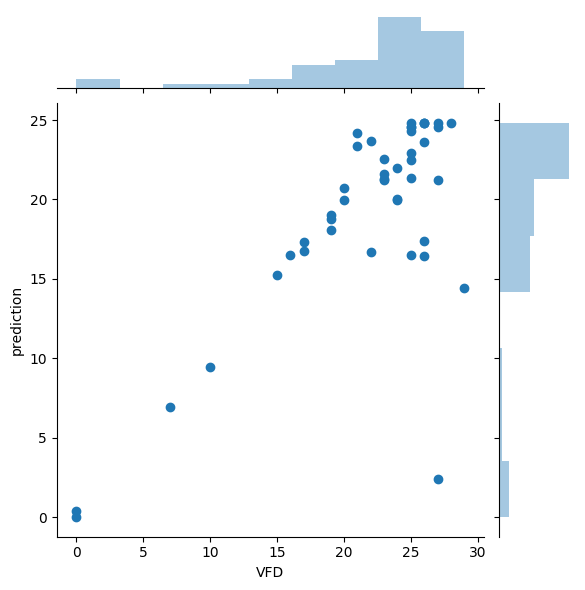

In [7]:
import seaborn as sns
X = XGB_Outputs_topn_df.VFD
y = XGB_Outputs_topn_df.prediction
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.jointplot(x=X,y=y);
plt.savefig()

bs = io.BytesIO()
plt.savefig(bs, format="png")
folder = Folder("plots")
folder.upload_stream("fig.png", bs.getvalue())